In [25]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn3, venn4
import matplotlib.pyplot as plt


transcripts
pc_transcripts
prom
transcripts 142351
pc_transcripts 67056
kallisto 32477
prom 41167


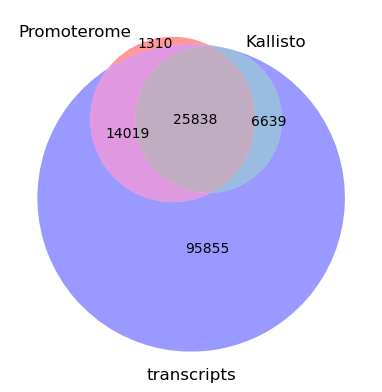

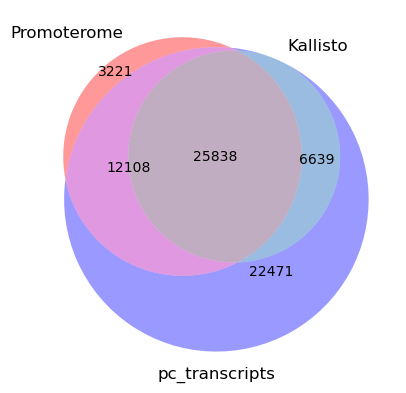

In [43]:
def remove_version(x):
    return [i.split('.')[0] for i in x]

transcripts = {}
infold = '../resources/genome/mm10'
infiles = {}
keys = ['transcripts','pc_transcripts']
for k in keys:
    print(k)
    infile = f'{infold}/{k}.txt'
    with open(infile) as f:
        transcripts[k] = [l.strip() for l in f.readlines()]


infile = infold+'/kallisto_transcripts.txt'
with open(infile) as f:
    transcripts['kallisto'] = [l.strip() for l in f.readlines()]

# Read in promoterome
print('prom')
infile = '../results/promoterome/mm10/promid_transcripts.txt'
promid_transcripts = pd.read_csv(infile, sep='\t', header=None)
promid_transcripts.columns = ['prom','transcript']

# fill in nan promoters
for i in promid_transcripts.index:
    if pd.isnull(promid_transcripts.iloc[i, 0]):
        promid_transcripts.iloc[i, 0] = promid_transcripts.iloc[i-1, 0]

# verify that all transcripts are unique
assert len(promid_transcripts.transcript.unique()) == len(promid_transcripts)

transcripts['prom'] = promid_transcripts.transcript.values

# Read in transcriptomes
infile = '../resources/genome/mm10/all_transcripts.txt'

# remove version from transcript ids
for k in transcripts:
    print(k, len(transcripts[k]))
    transcripts[k] = set(remove_version(transcripts[k]))

# Venn diagram between the three transcriptomes
for k in keys:
    fig, ax = plt.subplots()
    venn3([transcripts['prom'], transcripts['kallisto'], transcripts[k]], ('Promoterome', 'Kallisto', k))

In [ ]:
fold = '../resources/genome/mm10/

In [34]:

infile = '../resources/genome/mm10/gencode.vM23.annotation.gtf.gz'
df = pd.read_csv(infile, sep='\t', comment='#', header=None)

In [35]:
df

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ..."
...,...,...,...,...,...,...,...,...,...
1868199,chrM,ENSEMBL,transcript,15289,15355,.,+,.,"gene_id ""ENSMUSG00000064371.1""; transcript_id ..."
1868200,chrM,ENSEMBL,exon,15289,15355,.,+,.,"gene_id ""ENSMUSG00000064371.1""; transcript_id ..."
1868201,chrM,ENSEMBL,gene,15356,15422,.,-,.,"gene_id ""ENSMUSG00000064372.1""; gene_type ""Mt_..."
1868202,chrM,ENSEMBL,transcript,15356,15422,.,-,.,"gene_id ""ENSMUSG00000064372.1""; transcript_id ..."


In [28]:
set(transcripts['prom']) - set(transcripts['gencode']) 


{'ENSMUST00000073214',
 'ENSMUST00000139927',
 'ENSMUST00000070021',
 'ENSMUST00000122343',
 'ENSMUST00000181947',
 'ENSMUST00000114170',
 'ENSMUST00000180986',
 'ENSMUST00000071745',
 'ENSMUST00000145831',
 'ENSMUST00000093991',
 'ENSMUST00000184966',
 'ENSMUST00000142109',
 'ENSMUST00000144592',
 'ENSMUST00000110507',
 'ENSMUST00000050921',
 'ENSMUST00000074879',
 'ENSMUST00000071008',
 'ENSMUST00000142280',
 'ENSMUST00000163914',
 'ENSMUST00000181661',
 'ENSMUST00000147685',
 'ENSMUST00000079684',
 'ENSMUST00000183168',
 'ENSMUST00000099704',
 'ENSMUST00000179946',
 'ENSMUST00000164590',
 'ENSMUST00000071458',
 'ENSMUST00000093326',
 'ENSMUST00000179497',
 'ENSMUST00000038032',
 'ENSMUST00000177968',
 'ENSMUST00000179999',
 'ENSMUST00000142368',
 'ENSMUST00000143779',
 'ENSMUST00000164429',
 'ENSMUST00000181641',
 'ENSMUST00000140052',
 'ENSMUST00000179249',
 'ENSMUST00000164896',
 'ENSMUST00000181897',
 'ENSMUST00000126467',
 'ENSMUST00000111579',
 'ENSMUST00000181781',
 'ENSMUST00